# Social Data Analysis and Visualisation: COVID-19 Visualisation Project: Explainer Notebook

## 1. Motivation

#### What is your dataset?
In this project, data has be drawn upon from several sources to create a cohesive story about the impact of government responses and indicators on the coronavirus pandemic. Various aspects of these datasets were combined to create different visualisations that tell a story. The following datasets were utilised:
* Historical case data provided by the John Hopkins University
* A series of socio-economic indicators taken from the World Bank data archives
* Dataset of government responses compiled by ACAPS
* Stringency measures dataset calculated and compiled by Oxford University

#### Why did you choose this/these particular dataset(s)?
These particular datasets were chosen to give variety to the data used in this project. The John Hopkins University Coronavirus Resource Centre is a reliable source for up to date and accurate coronavirus case data. The dataset not only contains information about the number of coronavirus cases per country, however, also contains information for different locations within each country, for example, data for each of the major cities in Australia. The dataset from the John Hopkins University Coronavirus Resource Centre also contains latitude and longitude information which, will be utilised in a heat map movie visualisation. Instances of NaN values in the data is minimal, which, is essential to ensure accurate and up to date data. The world bank data archives contain a plethora of data. The variety of government indicators allows for exciting stories to be crafted and links between different indicators and the number of coronavirus cases to be drawn upon. The data comes from a reliable source, and data can be obtained for every country.

The government response data from ACAPS contains information about the different government responses to the coronavirus pandemic. However, most importantly, the dataset includes information on the dates that different measures were introduced. This is the point of difference that we were looking for in a dataset. By providing the dates different measures were introduced, we can explore the timing of the introduction of government responses, with the increase of coronavirus cases. Finally, the stringency measure dataset was a later addition to the project. While the government response dataset from ACAPS provides valuable information, it only contains qualitative data about government measures. In comparison, the Oxford University dataset quantifies the government responses to the pandemic in a 'stringency index' calculated variable. This information adds excellent value to the project as we can now look at how the severity of the government measures changes over time and with the increase/decrease of coronavirus cases. 

#### What was your goal for the end user's experience?
The goal of the project was to present a cohesive and informative story about the effect of the government responses and indicators on the coronavirus pandemic. We wanted to ensure that no previous knowledge was required and all information that is necessary to understand the story was provided in the website and visualisations. Throughout the development of the project, the three keys elements of successful visualisations, (1) overview first, (2) zoom and filter, (3) details on demand were kept forefront. 

Firstly, the user is given an overview of the current pandemic situation. The user is introduced to the story that the visualisations are hoping to tell. The idea of the introduction is to ensure that all information and trends are presented clearly and require little user input; this comes later. We wanted to ensure that all users had a clear understanding of the story before beginning to filter and zoom into the finer points of the story and datasets. 

After the introduction, we begin to filter the data and present more specific visualisations. Most of the visualisations from this point on are interactive only for the point that all users will understand and take in information differently. We do not want to overwhelm users by presenting all of the information at once. First, we want to reveal small pieces of information over time and link the user's understanding of each visualisation together by providing small explanatory discussions throughout the website. Understandably, different visualisations will speak to/click with different users. This is where the details on-demand element of successful visualisations are utilised. For users who are not interested in a specific visualisation, they can view the static visualisation, take in minimal information and move on. However, for the more interested user, they can interact with the plot to reveal details on demand and more information. What is essential to note though, is that the details that are revealed on demand while interesting and informative are not required to successfully progress through the website and gain a general understanding of the story. Rather, these pieces of information are there to enhance and provide more depth to a users understanding. 

Overall, we want to user to enjoy exploring the website in their own way and to take away information that appeals to them. 

## 2. Basic Statistics

#### Write about your choices in data cleaning and preprocessing
- Luca, you will probably have a better idea of what to say here. 

#### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
- Luca, you will probably have a better idea of what to say here too.

The following two plots show the basic statistics of the historical case data provided by the John Hopkins University and the socio-economic indicators taken from the World Bank data archives. Because the information provided in the ACAPS dataset in so varied and, is qualitative data, there are no basic statistics that can be provided. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

from folium import plugins
from folium.plugins import HeatMapWithTime, MarkerCluster, HeatMap

In [2]:
df = pd.read_csv("cases_by_day.csv",index_col=0)
df2 = pd.read_csv("deaths_by_day.csv",index_col=0)
df3 = pd.read_csv("recovered_by_day.csv",index_col=0)

In [3]:
# set global plot style
sns.set(style='ticks', palette='muted', color_codes=True)

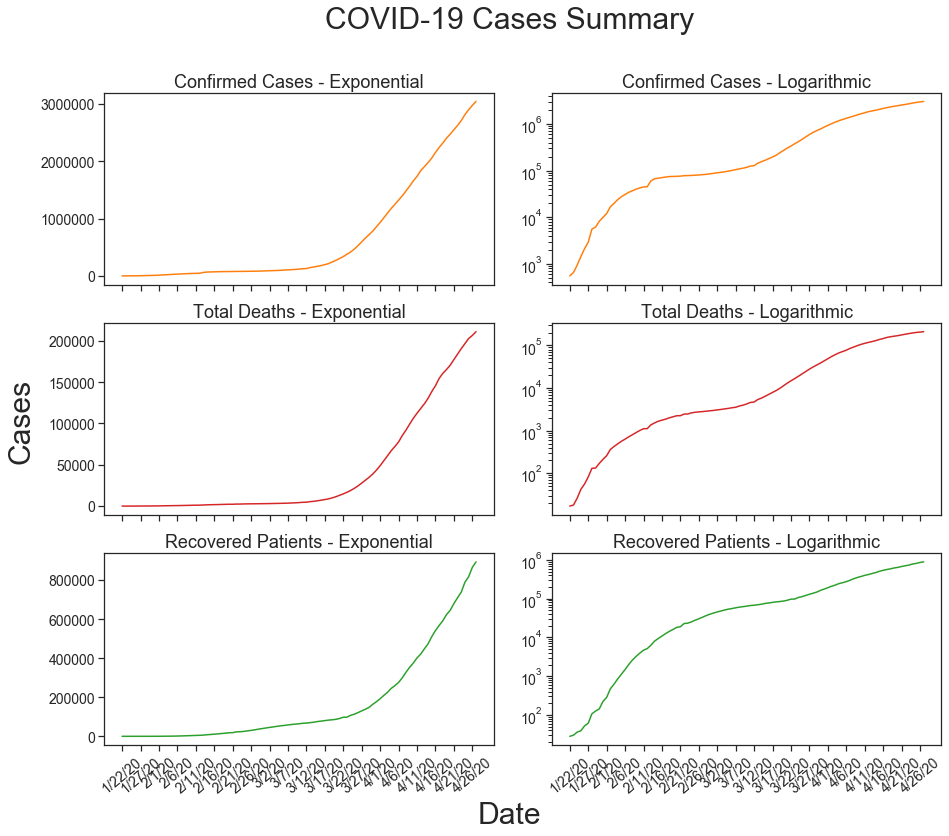

In [4]:
#Simple plot of total cases by day
x_ticks = []
i=0
for col in df:
    if(i%5 == 0):
        x_ticks.append(col)
    i = i +1

fig, axs = plt.subplots(3, 2, figsize = (15,12), sharex='col',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0.15})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
fig.suptitle('COVID-19 Cases Summary', fontsize = 30)
ax1.plot(df.columns, df.sum(), 'tab:orange')
ax2.plot(df.columns, df.sum(), 'tab:orange')
ax3.plot(df2.columns, df2.sum(), 'tab:red')
ax4.plot(df2.columns, df2.sum(), 'tab:red')
ax5.plot(df3.columns, df3.sum(), 'tab:green')
ax6.plot(df3.columns, df3.sum(), 'tab:green')

ax1.set(title = "Confirmed Cases - Exponential")
ax2.set(title = "Confirmed Cases - Logarithmic", yscale= "log")
ax3.set(title = "Total Deaths - Exponential")
ax4.set(title = "Total Deaths - Logarithmic", yscale= "log")
ax5.set(title = "Recovered Patients - Exponential")
ax6.set(title = "Recovered Patients - Logarithmic", yscale= "log")

ax1.title.set_size(18)
ax2.title.set_size(18)
ax3.title.set_size(18)
ax4.title.set_size(18)
ax5.title.set_size(18)
ax6.title.set_size(18)

for ax in axs.flat:
    ax.set_xticks(x_ticks)
    ax.tick_params('x', rotation = 40)
    ax.tick_params('y', labelsize ='large')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

fig.text(0.035, 0.5, "Cases", verticalalignment="center", rotation = 90, fontsize = 30);
fig.text(0.5, 0.035, "Date", horizontalalignment="center", rotation = 0, fontsize = 30);

plt.savefig('COVID_Cases_Plot.png')

In [7]:
data = pd.read_csv("worldbank_and_press_freedom.csv",index_col=0)
indicator_data = data[["gdp_per_capita", "universal_healthcare_coverage_index", "hospital_beds_per_1000", "physicians_per_1000", "health_expenditure_per_capita", "government_effectiveness", "political_stability"]]
indicator_labels = ['GDP', 'Healthcare Index', 'Hospital Beds', 'Doctors', 'Health Expenses', 'Gov. Effectiveness', 'Political Stability']
indicator_data.columns = indicator_labels
sns.set_style("white")

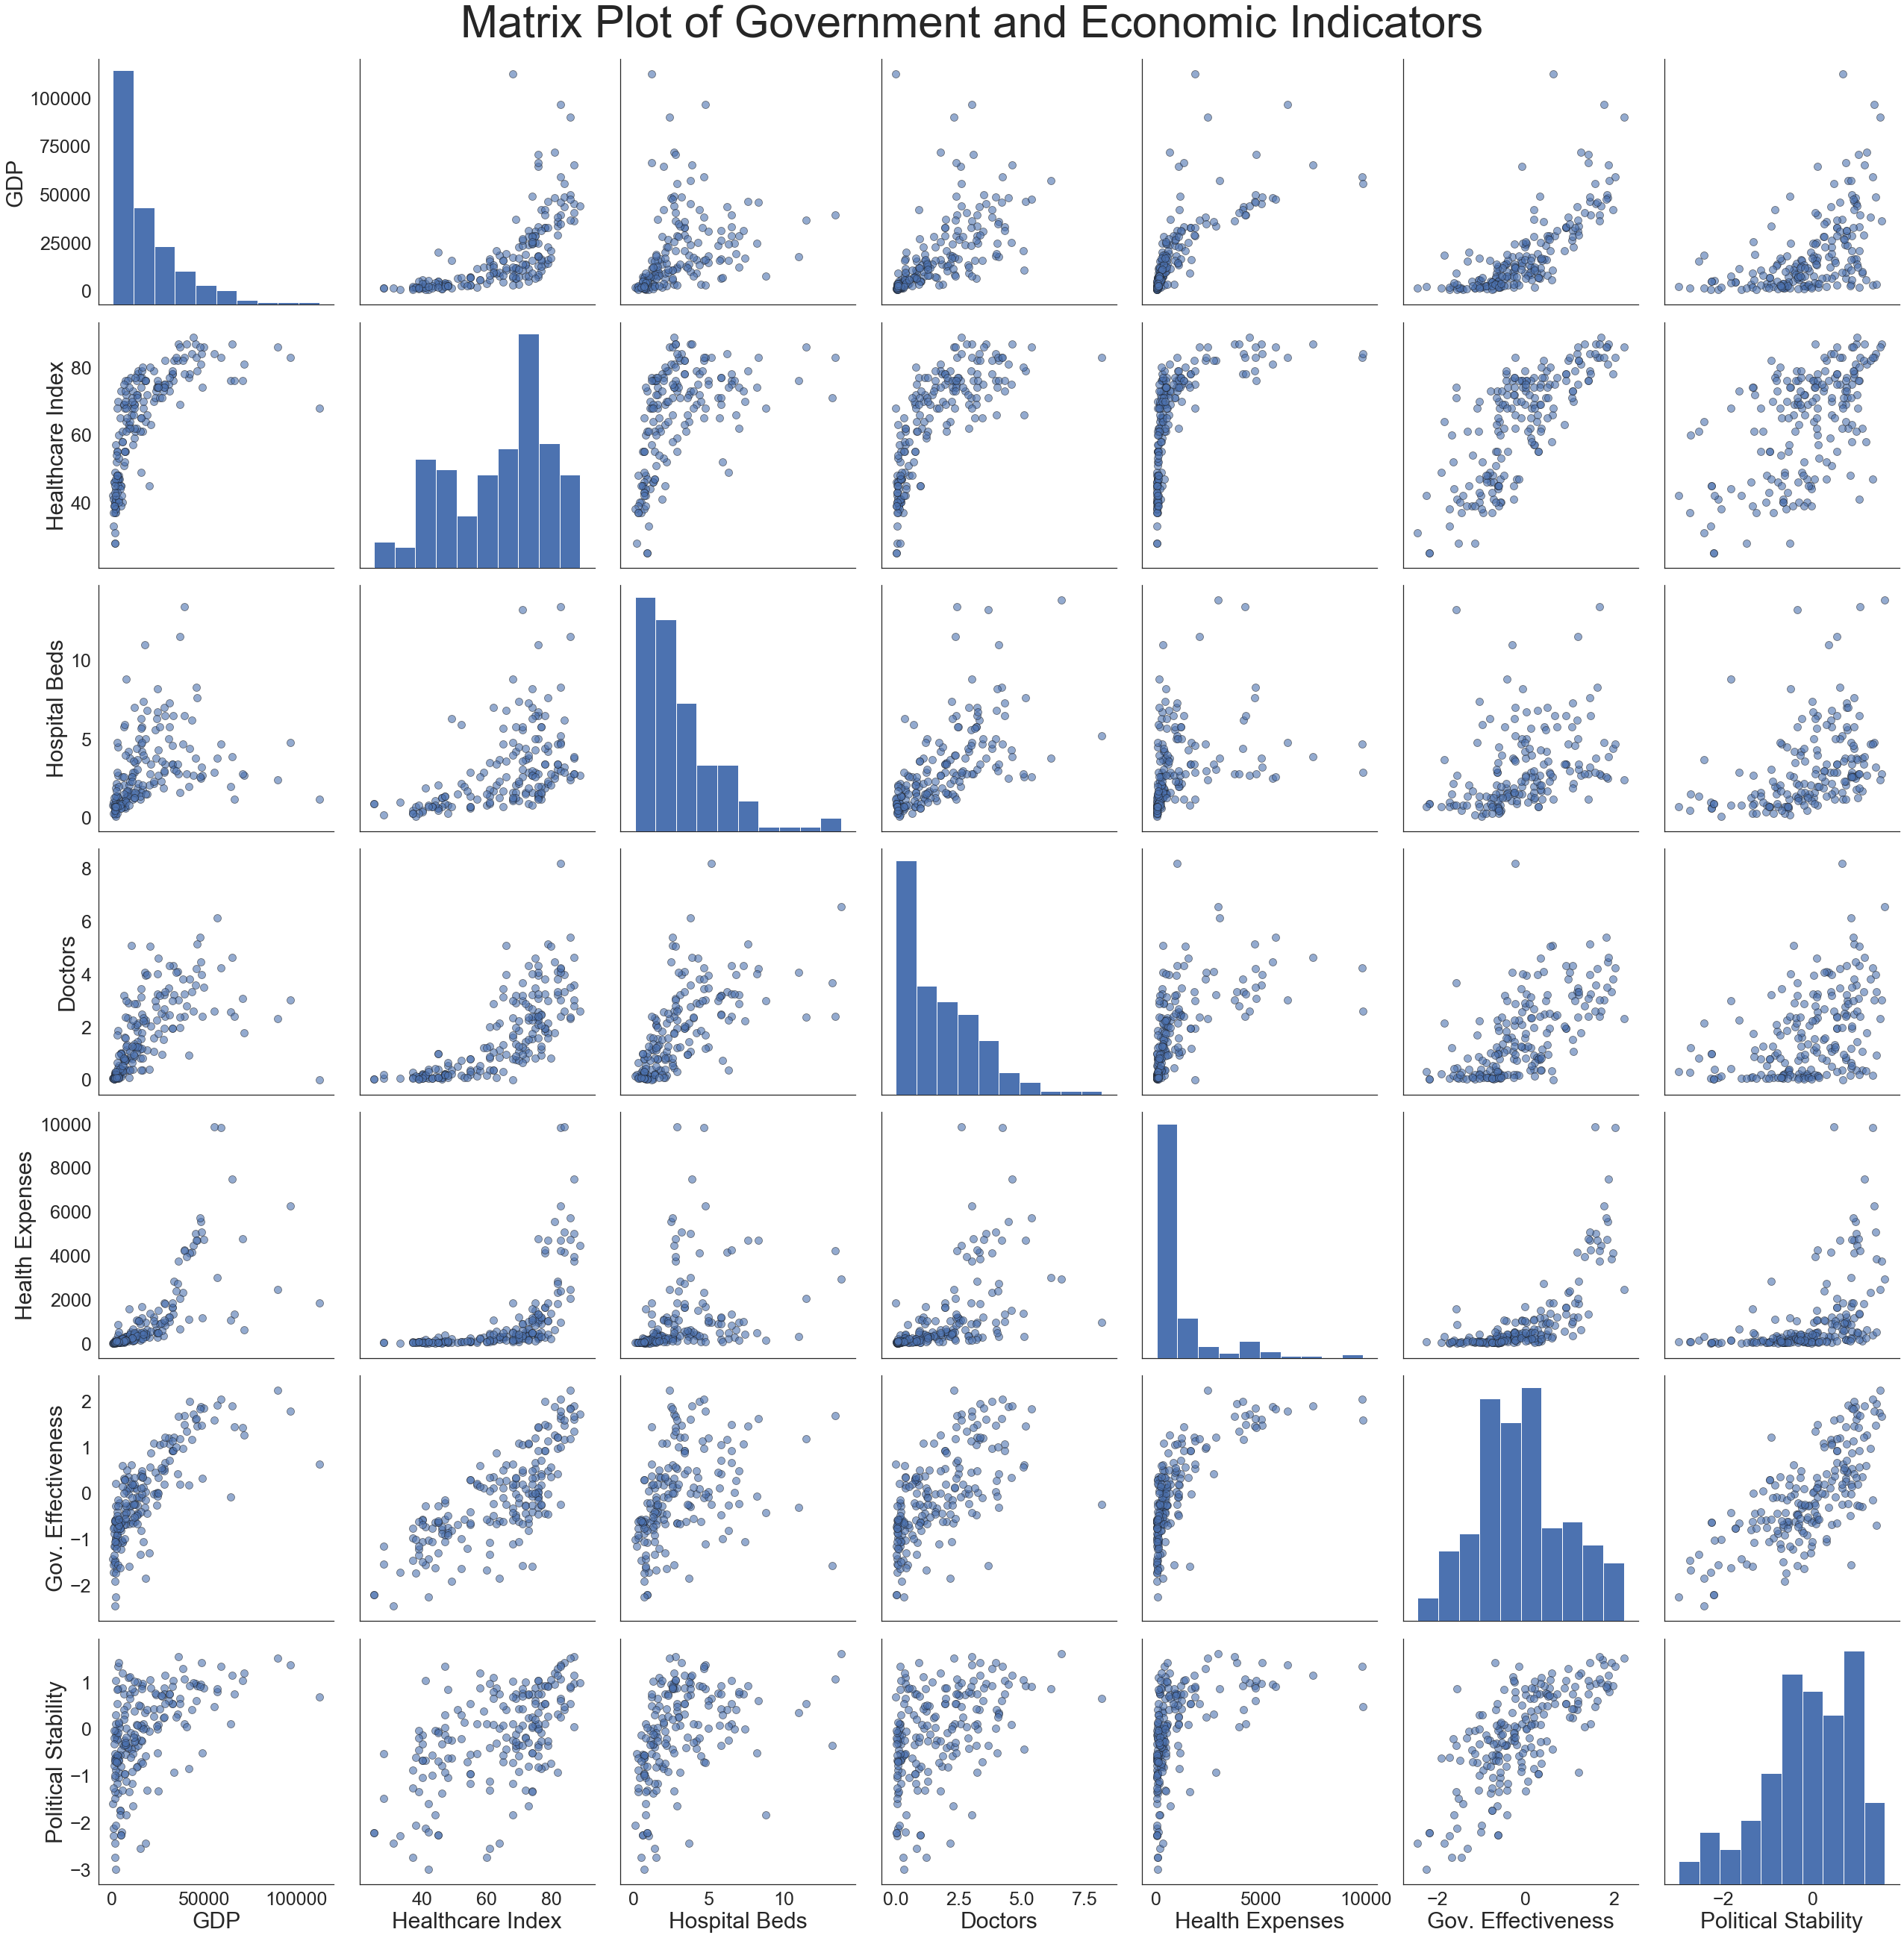

In [8]:
grid = sns.pairplot(indicator_data, 
             plot_kws = {'alpha': 0.6, 's': 100, 'edgecolor': 'k'},
             height = 5);

rc={'font.size': 30, 'axes.labelsize': 30, 'legend.fontsize': 20, 
    'axes.titlesize': 30, 'xtick.labelsize': 25, 'ytick.labelsize': 25}  

sns.set(rc)

grid.fig.suptitle("Matrix Plot of Government and Economic Indicators", y=1.025,  fontsize=60);

In [2]:
lat_lon_confirmed = pd.read_csv("lat_lon_confirmed.csv", index_col = 0)
lat_lon_confirmed = lat_lon_confirmed.reset_index()

In [3]:
listoflists = [] 

for col in lat_lon_confirmed.iloc[:,2:].iteritems():
    col = col[1]
    sublist = []
    for index,row in enumerate(col):
        long = lat_lon_confirmed.Long.iloc[index]
        lat = lat_lon_confirmed.Lat.iloc[index]
        weight = row
        if weight == 0:
            continue
        point = [lat,long,weight]
        sublist.append(point)
    listoflists.append(sublist)

In [4]:
# plot the map
mapmovie = folium.Map(location=[0, 0], zoom_start=1.75, tiles = "Stamen Toner", width = 900, height = 500)

# add the heat map with time
HeatMapWithTime(listoflists).add_to(mapmovie)

# show the movie
mapmovie

## 3. Data Analysis

#### Describe your data analysis and explain what you've learned about the dataset.
- Luca, you will probably have a better idea of what to say here too. 

## 4. Genre

#### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

#### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## 5. Visualisations

### Explain the visualizations you've chosen. Why are they right for the story you want to tell?

#### Visualisation 1: Heat Map Movie
- Bethany

Before we can continue with the analysis, we must first look at the government measures that have been introduced and the timing of their introduction. After exploring the lockdown measures and the timing of their introduction, it is then interesting to begin to explore the reasoning behind these measures. Governments worldwide have introduced totalitarian social distancing and lockdown laws in order to curb the spread of the virus. Utilising the coronavirus data, it is interesting to visualisation the number of coronavirus cases and days since the confirmation of the first case before the government went into lockdown. This visualisation is designed to show audiences the variation in lockdown measures and the timing of their introduction. It is designed to show the variation of the government responses to provoke thought and lead on to further visualisations where the reasons for the government actions and timings are explored. 

#### Visualisation 2: Slider Plot
- Jakob


#### Visualisation 3: Summary Statistics
- Bethany

The summary statistics plot falls under the introductory section of the website. The summary statstics plot is designed to show the overall spread of the virus and clearly explain to each user the exponential spread of the virus. 

#### Visualisation 4: Pandemic Curve Plot
- Bethany

The pandemic curve plot shows where different countries are in terms of the stage of the pandemic. The plot zooms in to the data and shows the pandemic curve for a selected group of countries. 

#### Visualisation 5: Government Measures
- Luca

Governments worldwide have introduced totalitarian social distancing and lockdown laws in order to curb the spread of the virus. Utilising the coronavirus data, it is interesting to visualisation the number of coronavirus cases and days since the confirmation of the first case before the government went into lockdown. A bubble plot style will be used to visualise this information. An interactive measure to the plot will also be added to give audiences details on demand. On hovering over the bubble of an individual country, information about the lockdown measure introduced will be revealed. This visualisation follows the annotated chart style however, with interactive elements. This visualisation is designed to show audiences the variation in lockdown measures and the timing of their introduction. It is designed to show the variation of the government responses to provoke thought and lead on to further visualisations where the reasons for the government actions and timings are explored.  

#### Visualisation 6: Healthcare Expenditure
- Luca

Depending on the wealth of each country, the healthcare expenditure will change. This is interesting to visualise as it shows the funds that each country spends on healthcare and can be considered an indication of how much healthcare each country can afford. When compared with the GDP and number of coronavirus cases, links can be drawn between the economic status of the country and the severity of the coronavirus pandemic experienced in that region. This visualisation is designed as an introduction to the key parameters relating to the coronavirus pandemic, government and economic data. This visualisation falls under the annotated chart genre. It is a static visualisation that is primarily author driven. 

#### Visualisation 7: Healthcare System
- Luca

After exploring the lockdown measures and the timing of their introduction, it is then interesting to begin to explore the reasoning behind these measures. A crucial part of this investigation is exploring how the quality of the healthcare system has influenced the government measures. Questions like have some countries been quicker to put the country into lockdown because they don’t have the health system capacity, are interesting to explore. A bubble plot display the speed of lockdown introduction (i.e. number of days after the first case before the country went into lockdown) compared to the universal healthcare coverage index and the capacity of the healthcare system classified by the number of hospital beds. Other information, including the number of healthcare personnel will be provided adding an interactive element to the plot. This visualisation is a static visualisation and falls under the annotated chart style however, does include interactive elements. The visualisation is designed to show how the capacity of the healthcare systems has influenced government decisions during the pandemic.

#### Visualisation 8: Political State
- Luca

A visualisation analysing the political system of each country and how this has affected the spread of the coronavirus is also interesting to explore. Measures including government effectiveness and political stability have been from the world bank’s data archives. It is interesting to explore how the stability and effectiveness of the government has impacted the rate of the coronavirus spread. This will be shown in a scatter plot style visualisation. The visualisation is static, author driven and falls under the annotated chart visualisation genre.

#### Visualisation 9: Stringency Measures Slider Plot
- Jakob

#### Visualisation 10: Stringency and Number of Coronavirus Cases
- Bethany

#### Visualisation 11: Epidemic Curve and Stringency Measures
- Bethany


## 6. Discussion

#### What went well?
#### What is still missing? What could be improved? Why?

## 7. Contributions

| Project Element | s196573 (Bethany) | s200237 (Luca) | s196642 (Jakob) |
| --- | --- | --- | --- |
| Development of Idea | 33.3% | 33.3% | 33.3% |
| Data Collection | 10% | 80% | 10% |
| Data Cleaning and Reduction | 10% | 80% | 10% |
| Initial Data Explanations | 80% | 10% | 10% |
| Visualisation Planning | 60% | 20% | 20% |
| Project Part A: Video | 80% | 10% | 10% |
| Data Manipulation | 33.3% | 33.3% | 33.3% |
| Visualisation 1: Heat Map Movie | 60% | 30% | 10% |
| Visualisation 2: Slider Plot | 10% | 10% | 80% |
| Visualisation 3: Summary Statistics| 30% | 10% | 60% |
| Visualisation 4: Pandemic Curve Plot| 60% | 30% | 10% |
| Visualisation 5: Government Measures| 10% | 80% | 10% |
| Visualisation 6: Healthcare Expenditure| 10% | 80% | 10% |
| Visualisation 7: Healthcare System| 10% | 80% | 10% |
| Visualisation 8: Political State| 10% | 80% | 10% |
| Visualisation 9: Stringency Measures Plot| 10% | 10% | 80% |
| Visualisation 10: Stringency and Number of Coronavirus Cases| 80% | 10% | 10% |
| Visualisation 11: Epidemic Curve and Stringency Measures| 80% | 10% | 10% |
| Creation of Website |  |  |  |
| Explanations for Website |  |  |  |
| Explainer Notebook |  |  |  |
| Final Editing |  |  |  |

# Code

WE WON'T PUT THE CODE IN HERE UNTIL IT'S FINISHED